# Pokemon Image Classification

In [1]:
# !pip uninstall keras -y
# !pip uninstall keras-nightly -y
# !pip uninstall keras-Preprocessing -y
# !pip uninstall keras-vis -y
# !pip uninstall tensorflow -y

# !pip install tensorflow
# !pip install keras

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
import numpy as np

import os

In [3]:
print(tf.__version__)

2.18.0


In [4]:
data = 'images'

batch_size = 32
img_height = 120
img_width = 120

final_ds = tf.keras.utils.image_dataset_from_directory(
    data,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

train_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 39696 files belonging to 1711 classes.
Found 39696 files belonging to 1711 classes.
Using 27788 files for training.
Found 39696 files belonging to 1711 classes.
Using 11908 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '100', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10008', '10009', '10010', '10011', '10012', '10013', '10014', '10015', '10016', '10017', '10018', '10019', '10020', '10021', '10022', '10023', '10024', '10025', '10026', '10027', '10028', '10029', '10030', '10031', '10032', '10033', '10034', '10035', '10036', '10037', '10038', '10039', '10040', '10041', '10042', '10043', '10044', '10045', '10046', '10047', '10048', '10049', '10050', '10051', '10052', '10053', '10054', '10055', '10056', '10057', '10058', '10059', '10060', '10061', '10062', '10063', '10064', '10065', '10066', '10067', '10068', '10069', '10070', '10071', '10072', '10073', '10074', '10075', '10076', '10077', '10078', '10079', '10080', '10081', '10082', '10083', '10084', '10085', '10086', '10087', '10088', '10089', '10090', '10091', '10092', '10093', '10094', '10095', '10096', '10097', '10098', '10099', '101', '10100', '10101', '10102', '10103', '10104', '10105', '10106', '10107', '10108

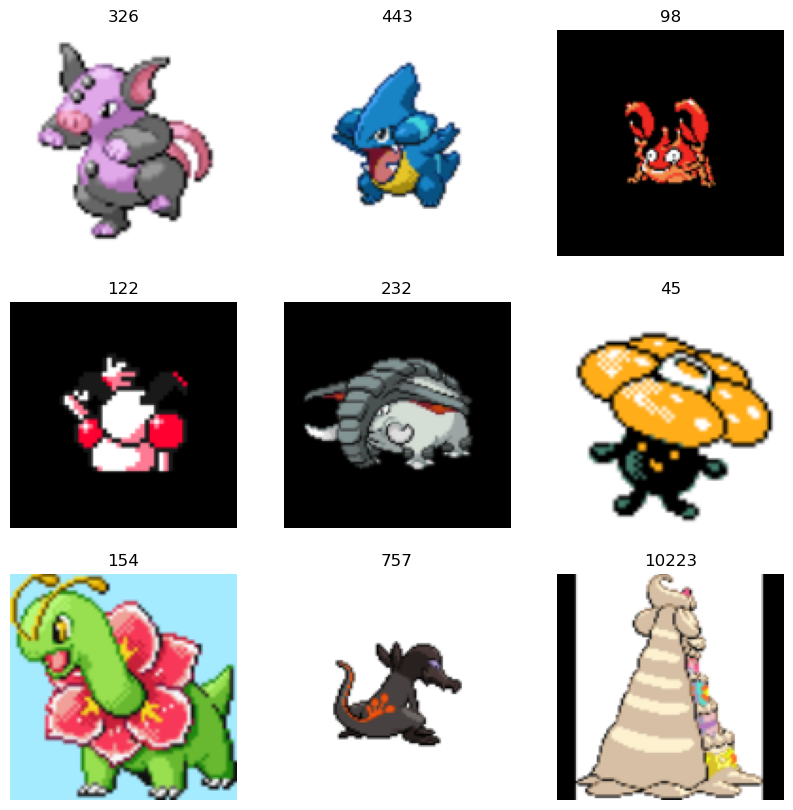

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
num_classes = len(class_names)

#Sequential model
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [8]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [9]:
epochs = 12

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/12
869/869 ━━━━━━━━━━━━━━━━━━━━ 126s 141ms/step - accuracy: 0.0046 - loss: 7.0058 - val_accuracy: 0.0280 - val_loss: 6.1316
Epoch 2/12
869/869 ━━━━━━━━━━━━━━━━━━━━ 123s 141ms/step - accuracy: 0.0557 - loss: 5.6410 - val_accuracy: 0.1552 - val_loss: 4.8731
Epoch 3/12
869/869 ━━━━━━━━━━━━━━━━━━━━ 123s 141ms/step - accuracy: 0.2389 - loss: 3.9567 - val_accuracy: 0.2891 - val_loss: 4.0098
Epoch 4/12
869/869 ━━━━━━━━━━━━━━━━━━━━ 118s 136ms/step - accuracy: 0.4422 - loss: 2.6209 - val_accuracy: 0.3994 - val_loss: 3.5156
Epoch 5/12
869/869 ━━━━━━━━━━━━━━━━━━━━ 119s 137ms/step - accuracy: 0.5909 - loss: 1.8198 - val_accuracy: 0.4617 - val_loss: 3.2939
Epoch 6/12
869/869 ━━━━━━━━━━━━━━━━━━━━ 120s 138ms/step - accuracy: 0.6908 - loss: 1.2981 - val_accuracy: 0.4819 - val_loss: 3.5269
Epoch 7/12
869/869 ━━━━━━━━━━━━━━━━━━━━ 121s 140ms/step - accuracy: 0.7522 - loss: 0.9738 - val_accuracy: 0.5137 - val_loss: 3.7727
Epoch 8/12
869/869 ━━━━━━━━━━━━━━━━━━━━ 123s 141ms/step - accuracy: 0.8033 -

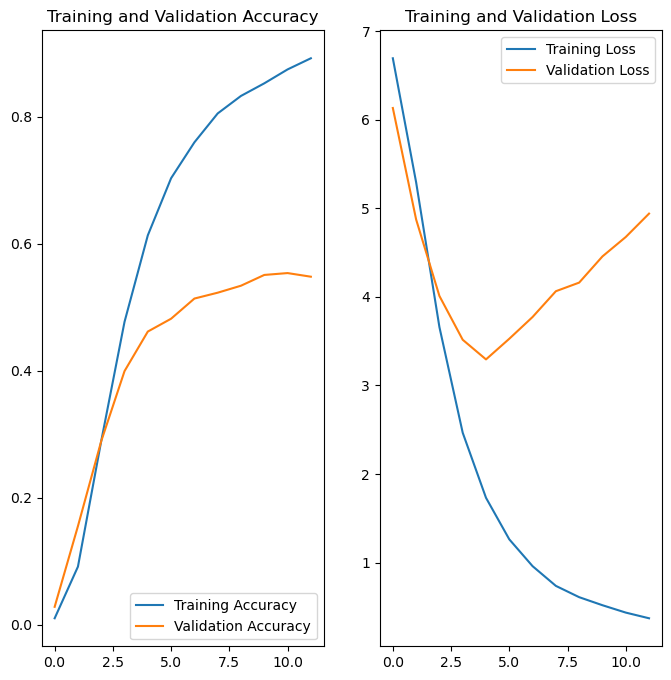

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

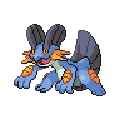

In [11]:
tf.keras.utils.load_img('images/260/260461-260.png', target_size=(img_height, img_width))

In [15]:
img = tf.keras.utils.load_img(
    'images/260/260461-260.png', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
This image most likely belongs to 260 with a 55.07 percent confidence.


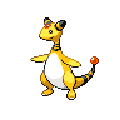

In [16]:
tf.keras.utils.load_img('images/181/181337-181.png', target_size=(img_height, img_width))

In [17]:
img = tf.keras.utils.load_img(
    'images/181/181337-181.png', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
This image most likely belongs to 785 with a 99.58 percent confidence.
